In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

import cv2

Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 121.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 121.txt


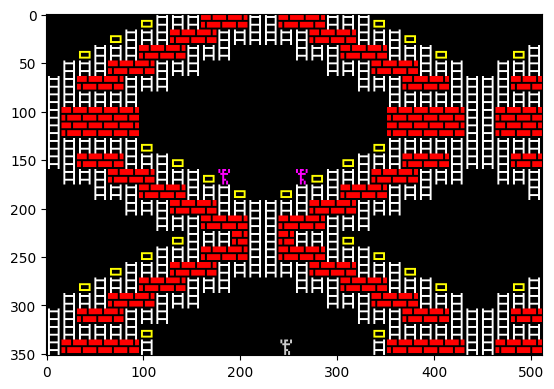

In [3]:
levelNum = 25

lrLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Original_Fixed_Tom/Level*.png"))
print(f"Level Image Being Loaded: {lrLevelPaths[levelNum]}")

lrStringLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Processed/Level*.txt"))
print(f"Level String Being Loaded: {lrStringLevelPaths[levelNum]}")

with open(lrStringLevelPaths[levelNum], "r") as f:
    levelString = np.array([list(line[:-1]) for line in f.readlines()])

levelImage = cv2.cvtColor(cv2.imread(lrLevelPaths[levelNum]), cv2.COLOR_BGR2RGB)
plt.imshow(levelImage)

In [9]:
(levelImage.shape[0] // 16) - 1

21

In [33]:
levelWeights = []

for l in range(0, len(lrLevelPaths)):

    lrLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Original_Fixed_Tom/Level*.png"))
    print(f"Level Image Being Loaded: {lrLevelPaths[l]}")

    lrStringLevelPaths = sorted(glob.glob("../data/vglc/Lode Runner/Processed/Level*.txt"))
    print(f"Level String Being Loaded: {lrStringLevelPaths[l]}")

    with open(lrStringLevelPaths[l], "r") as f:
        levelString = np.array([list(line[:-1]) for line in f.readlines()])

    levelImage = cv2.cvtColor(cv2.imread(lrLevelPaths[l]), cv2.COLOR_BGR2RGB)
    
    levelWeight = 0

    for i in range((levelImage.shape[0] // 16) - 1, 0, -1):

        rowImages = []
        rowAffordances = []

        for j in range(0, levelImage.shape[1] // 16):

            y = i * 16
            x = j * 16

            # print(f"y: {y}, x: {x}")

            rowImages.append(levelImage[y:y+16, x:x+16, :])
            rowAffordances.append(levelString[i, j])

            if levelString[i, j] == 'E':
                levelWeight += -1
                continue
            
            if levelString[i, j] == 'G':
                levelWeight += 1
                continue

            # # Solid Block That Character can Traverse
            # if levelString[i, j] in ['#', 'b', 'B', '-']:
            #     print(f"Found Block: {i}, {j}")

            #     # Make sure block isn't on the first row of tiles
            #     if i != (levelImage.shape[0] // 16) - 1:

            #         # Check if current tile is a ladder or rope and block below is gap
            #         if levelString[i, j] in ['#', '-'] and levelString[i + 1, j] == '.':
            #             print("Gap Found")
            #             title += f" Gap Found Below"

        # _, axes = plt.subplots(1, 32, figsize=(15, 15))

        # for t, ax in enumerate(axes):
        #     ax.axis(False)
        #     ax.set_title(rowAffordances[t])
        #     ax.imshow(rowImages[t])

    levelWeight /= ((levelImage.shape[0] // 16) * (levelImage.shape[1] // 16))
    print(levelWeight)
    levelWeights.append(levelWeight)
    

Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 1.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 1.txt
0.002840909090909091
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 10.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 10.txt
0.009943181818181818
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 100.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 100.txt
0.03125
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 101.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 101.txt
0.028409090909090908
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 102.png
Level String Being Loaded: ../data/vglc/Lode Runner/Processed/Level 102.txt
0.017045454545454544
Level Image Being Loaded: ../data/vglc/Lode Runner/Original_Fixed_Tom/Level 103.png
Level String Being Loaded: ../

In [34]:
print(min(levelWeights))
print(max(levelWeights))

-0.0014204545454545455
0.18323863636363635


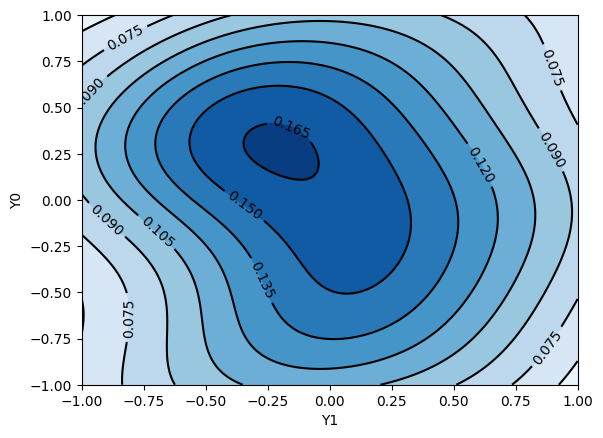

In [36]:
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
data = levelWeights
x = data[:, 0]
y = data[:, 1]
xmin, xmax = -1, 1
ymin, ymax = -1, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

plt.show()